# About Dataset

## Overview
The Student Social Media & Relationships dataset contains anonymized records of students’ social-media behaviors and related life outcomes. It spans multiple countries and academic levels, focusing on key dimensions such as usage intensity, platform preferences, and relationship dynamics. Each row represents one student’s survey response, offering a cross-sectional snapshot suitable for statistical analysis and machine-learning applications.

## Scope & Coverage
- **Population**: Students aged 16–25 enrolled in high school, undergraduate, or graduate programs.
- **Geography**: Multi-country coverage (e.g., Bangladesh, India, USA, UK, Canada, Australia, Germany, Brazil, Japan, South Korea).
- **Timeframe**: Data collected via a one-time online survey administered in Q1 2025.
- **Volume**: Configurable sample sizes (e.g., 100, 500, 1,000 records) based on research needs.

## Data Collection & Methodology
- **Survey Design**: Questions adapted from validated scales on social-media addiction (e.g., Bergen Social Media Addiction Scale) and relationship conflict indices.
- **Recruitment**: Participants recruited through university mailing lists and social-media platforms, ensuring diversity in academic level and country.
- **Data Quality Controls**:
  - **Validation**: Mandatory fields and range checks (e.g., usage hours between 0–24).
  - **De-duplication**: Removal of duplicate entries via unique `Student_ID` checks.
  - **Anonymization**: No personally identifiable information collected.

## Key Variables
| Variable                          | Type         | Description                                                                 |
|-----------------------------------|--------------|-----------------------------------------------------------------------------|
| `Student_ID`                      | Integer      | Unique respondent identifier                                               |
| `Age`                             | Integer      | Age in years                                                               |
| `Gender`                          | Categorical  | “Male” or “Female”                                                         |
| `Academic_Level`                  | Categorical  | High School / Undergraduate / Graduate                                     |
| `Country`                         | Categorical  | Country of residence                                                       |
| `Avg_Daily_Usage_Hours`           | Float        | Average hours per day on social media                                      |
| `Most_Used_Platform`              | Categorical  | Instagram, Facebook, TikTok, etc.                                          |
| `Affects_Academic_Performance`    | Boolean      | Self-reported impact on academics (Yes/No)                                 |
| `Sleep_Hours_Per_Night`           | Float        | Average nightly sleep hours                                                |
| `Mental_Health_Score`             | Integer      | Self-rated mental health (1 = poor to 10 = excellent)                      |
| `Relationship_Status`             | Categorical  | Single / In Relationship / Complicated                                     |
| `Conflicts_Over_Social_Media`     | Integer      | Number of relationship conflicts due to social media                       |
| `Addicted_Score`                  | Integer      | Social Media Addiction Score (1 = low to 10 = high)                        |

## Potential Analyses
- **Correlation Studies**: Examine associations between daily usage hours and mental-health score or sleep hours.
- **Predictive Modeling**: Build classifiers to predict relationship conflicts based on usage patterns and platform type.
- **Clustering**: Identify user segments (e.g., “high-usage high-stress” vs. “moderate-usage balanced”) across countries.

## Limitations
- **Self-Report Bias**: All measures are self-reported and may be subject to social-desirability effects.
- **Cross-Sectional Design**: One-time survey prevents causal inference.
- **Sampling Variability**: Recruitment via online channels may underrepresent students with limited internet access.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/gerrik/Documents/Data-Analytics-Portfolio/Students_Social_Media_Addiction_Analyse/data/Students Social Media Addiction.csv")
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [6]:
df.duplicated().sum()


np.int64(0)

In [7]:
df.isna().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

<Figure size 1500x500 with 0 Axes>

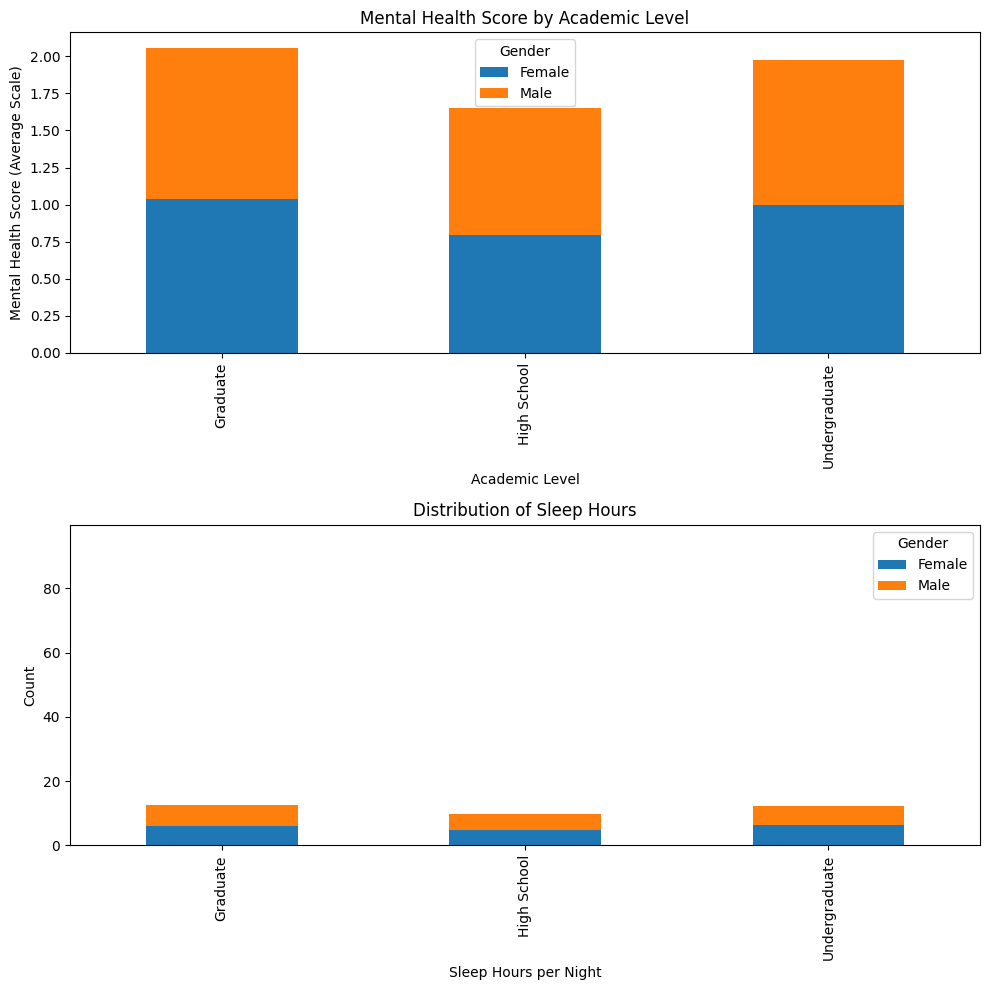

In [16]:
# Visualisierung der Verteilung von mentaler Gesundheit und Schlafstunden
# Die Plots zeigen die Häufigkeitsverteilung der psychischen Gesundheitswerte (1-10) 
# und der durchschnittlichen Schlafdauer pro Nacht

import seaborn as sns

import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# Calculate averages by Academic Level and Gender
avg_by_group = df.groupby(['Academic_Level', 'Gender']).agg({
    'Mental_Health_Score': 'mean',
    'Sleep_Hours_Per_Night': 'mean'
}).unstack()

# Plot stacked bars
avg_by_group['Mental_Health_Score'].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Average Mental Health Score by Academic Level and Gender')
ax1.set_xlabel('Academic Level')
ax1.set_ylabel('Average Mental Health Score')
ax1.legend(title='Gender')

avg_by_group['Sleep_Hours_Per_Night'].plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Average Sleep Hours by Academic Level and Gender')
ax2.set_xlabel('Academic Level')
ax2.set_ylabel('Average Sleep Hours')
ax2.legend(title='Gender')
# Plot distribution of Mental Health Score
sns.histplot(data=df, x='Mental_Health_Score', bins=10, ax=ax1)
ax1.set_title('Distribution of Mental Health Scores')
ax1.set_xlabel('Mental Health Score (1-10)')
ax1.set_ylabel('Count')
plt.clf()  # Clear the current figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Calculate overall averages for scaling
mental_health_avg = df['Mental_Health_Score'].mean()
sleep_hours_avg = df['Sleep_Hours_Per_Night'].mean()

# Scale the values to mental health average
scaled_mental = avg_by_group['Mental_Health_Score'] / mental_health_avg
scaled_sleep = avg_by_group['Sleep_Hours_Per_Night'] / sleep_hours_avg * mental_health_avg

# Plot stacked bars with scaled values
scaled_mental.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Mental Health Score by Academic Level')
ax1.set_xlabel('Academic Level')
ax1.set_ylabel('Mental Health Score (Average Scale)')
ax1.legend(title='Gender')

scaled_sleep.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Sleep Hours by Academic Level')
ax2.set_xlabel('Academic Level')
ax2.set_ylabel('Sleep Hours (Mental Health Score Scale)')
ax2.legend(title='Gender')

# Plot distribution of Sleep Hours
sns.histplot(data=df, x='Sleep_Hours_Per_Night', bins=15, ax=ax2)
ax2.set_title('Distribution of Sleep Hours')
ax2.set_xlabel('Sleep Hours per Night')
ax2.set_ylabel('Count')

plt.tight_layout()
